In [1]:
import pandas as pd
from pulp import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Project lists
df_p = pd.read_excel('warehouses.xlsx', sheet_name = 'projects')
df_p

,PROJECT NUMBER,PROJECT DESCRIPTION,CUSTOMER,VERTICAL,WH,SQM,COUNTRY,TURNOVER,YEAR 1,YEAR 2,YEAR 3,TOTAL,ROI,OPERATIONS,SUSTAINABILITY,BUSINESS DEV,HSE,DIGITAL TRANSFORMATION,CSR,OPERATIONAL EXCELLENCE
0,1,5S VISUAL MANAGEMENT,LUXURY 3,LUXURY,WH01,4000,CHINA,5000000,11500.0,3500,2450.0,17450,-750.0,WAREHOUSING,False,False,True,False,False,True
1,2,ADDITIONAL SPACE WITH RACKING,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000.0,250000,300000.0,750000,180000.0,WAREHOUSING,False,True,False,False,False,False
2,3,ADDITIONAL SPACE WITH RACKING,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE,4500000,220000.0,320000,350000.0,890000,213600.0,WAREHOUSING,False,True,False,False,False,False
3,4,ADDITIONAL SPACE WITH RACKING,FASHION 1,FASHION,WH01,2000,CHINA,1000000,75000.0,100000,110000.0,285000,49875.0,WAREHOUSING,False,True,False,False,False,False
4,5,ADDITIONAL SPACE WITH RACKING,FASHION 2,FASHION,WH01,500,CHINA,850000,90000.0,110000,130000.0,330000,70620.0,WAREHOUSING,False,True,False,False,False,False
5,6,ADDITIONAL RACKING,FASHION 6,FASHION,WH04,2000,CHINA,2150000,115000.0,115000,115000.0,345000,51750.0,WAREHOUSING,False,True,False,False,False,False
6,7,AIR CONDITIONING FOR OFFICE (HSE),AUTOMOTIVE 2,AUTOMOTIVE,WH02,2500,KOREA,2150000,35000.0,35000,35000.0,105000,-17500.0,WAREHOUSING,False,False,True,False,False,False
7,8,AUTOMATED ACCESS POINT WITH FINGERPRINT FOR WO...,FASHION 3,FASHION,WH01,1500,CHINA,2500000,1875.0,1875,1875.0,5625,-3750.0,WAREHOUSING,False,False,True,True,False,False
8,9,AUTOMATED GUIDED VEHICLES,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000.0,200000,200000.0,600000,-30000.0,TRANSPORTATION,False,True,False,True,False,True
9,10,AUTOMATED ORDER PICKER (PRODUCTIVITY),JEWELRY 1,JEWELRY,WH01,2000,CHINA,4000000,65000.0,50000,50000.0,165000,16500.0,TRANSPORTATION,False,False,True,True,False,True


In [3]:
# Fill NULL values with zero for numerical columns
for COL in ['TURNOVER', 'YEAR 1', 'YEAR 2', 'YEAR 3', 'ROI']:
    df_p[COL] =  df_p[COL].fillna(0).astype(int)
    
# Create project description linked to the customer
df_p['PROJECT DESCRIPTION'] = df_p['PROJECT DESCRIPTION'].astype(str) + '-' + df_p['CUSTOMER']

print("{:,} projects in your list.".format(len(df_p)))
df_p.head()

58 projects in your list.


,PROJECT NUMBER,PROJECT DESCRIPTION,CUSTOMER,VERTICAL,WH,SQM,COUNTRY,TURNOVER,YEAR 1,YEAR 2,YEAR 3,TOTAL,ROI,OPERATIONS,SUSTAINABILITY,BUSINESS DEV,HSE,DIGITAL TRANSFORMATION,CSR,OPERATIONAL EXCELLENCE
0,1,5S VISUAL MANAGEMENT-LUXURY 3,LUXURY 3,LUXURY,WH01,4000,CHINA,5000000,11500,3500,2450,17450,-750,WAREHOUSING,False,False,True,False,False,True
1,2,ADDITIONAL SPACE WITH RACKING-LUXURY 4,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000,250000,300000,750000,180000,WAREHOUSING,False,True,False,False,False,False
2,3,ADDITIONAL SPACE WITH RACKING-AUTOMOTIVE 1,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE,4500000,220000,320000,350000,890000,213600,WAREHOUSING,False,True,False,False,False,False
3,4,ADDITIONAL SPACE WITH RACKING-FASHION 1,FASHION 1,FASHION,WH01,2000,CHINA,1000000,75000,100000,110000,285000,49875,WAREHOUSING,False,True,False,False,False,False
4,5,ADDITIONAL SPACE WITH RACKING-FASHION 2,FASHION 2,FASHION,WH01,500,CHINA,850000,90000,110000,130000,330000,70620,WAREHOUSING,False,True,False,False,False,False


## EDA

### Number of projects per Vertical

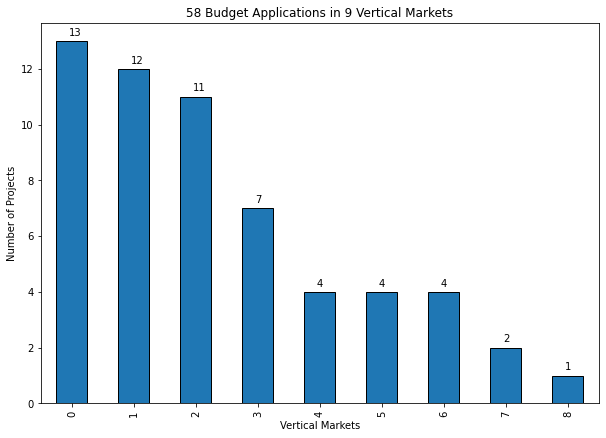

In [4]:
df_bar = pd.DataFrame(df_p.groupby(['VERTICAL'])['PROJECT NUMBER'].count())
df_bar.sort_values(by = 'PROJECT NUMBER', ascending = False, inplace = True)
df_bar.reset_index(inplace = True)
ax = df_bar.plot.bar(figsize = (10, 7), edgecolor = 'black', y = 'PROJECT NUMBER', legend = False)
plt.xlabel('Vertical Markets')
plt.ylabel('Number of Projects')
plt.title('{} Budget Applications in 9 Vertical Markets'.format(len(df_p)))

# Add labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1 +0.2, p.get_height() * 1 + 0.2))
    
plt.show()

### Budget application amount per Vertical

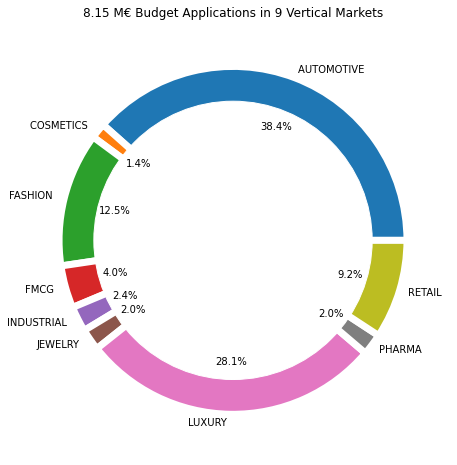

In [5]:
my_circle = plt.Circle( (0,0), 0.8, color='white')
df_p.groupby(['VERTICAL']).sum().plot.pie(figsize=(8, 8), y='TOTAL', legend= False, pctdistance=0.7,
                                          autopct='%1.1f%%', labeldistance=1.05, 
                                          wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.xlabel('Business Vertical')
plt.title('{:.2f} M€ Budget Applications in 9 Vertical Markets'.format(df_p['TOTAL'].sum()/1e6))

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

### Budget application per Country

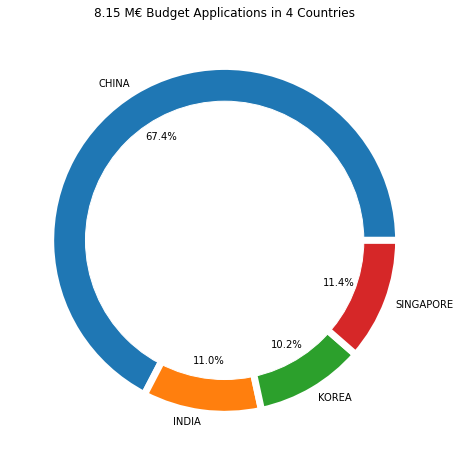

In [6]:
df_budg = pd.DataFrame((df_p.groupby(['COUNTRY'])['TOTAL'].sum()/1e6).round(2))
my_circle = plt.Circle( (0,0), 0.8, color='white')
df_budg.plot.pie(figsize=(8, 8), y='TOTAL', legend= False, pctdistance=0.7,
                                          autopct='%1.1f%%', labeldistance=1.05, 
                                          wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.xlabel('Business Vertical')
plt.ylabel('(M€)')
plt.title('{:.2f} M€ Budget Applications in 4 Countries'.format(df_p['TOTAL'].sum()/1e6))

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

### Budget allocation per management objective

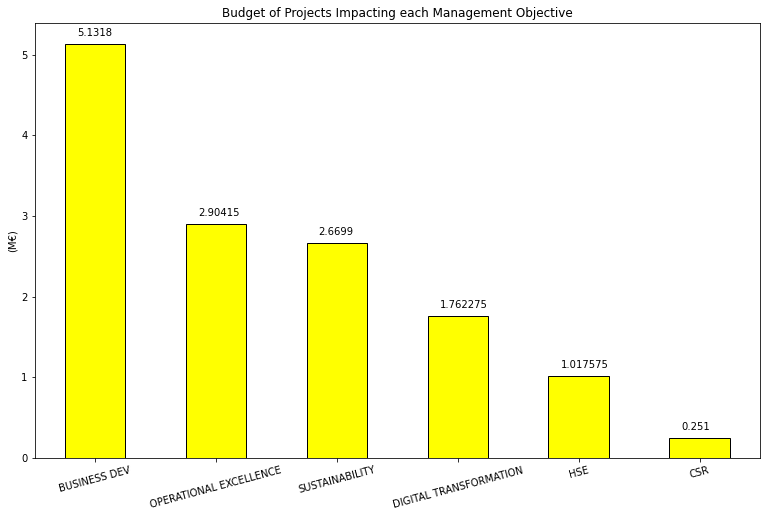

In [7]:
OBJ = ['SUSTAINABILITY', 'BUSINESS DEV', 'HSE', 'DIGITAL TRANSFORMATION',
       'CSR', 'OPERATIONAL EXCELLENCE']
df_obj = df_p.copy()
for COL in OBJ:
    # If in the objective column is false, then when summing up per row, it's going to be zero.
    df_obj[COL] = df_obj[COL]*df_obj['TOTAL']
df_obj = pd.DataFrame(df_obj[OBJ].sum(axis = 0)/1E6)
# Name the sum column as 'BUDGET'
df_obj.columns = ['BUDGET']
df_obj.sort_values(by = 'BUDGET', ascending = False, inplace = True)

ax = df_obj.plot.bar(figsize = (13, 8), edgecolor = 'black', y = 'BUDGET', color = 'yellow', legend = False)
plt.xticks(rotation = 15)
plt.ylabel('(M€)')
plt.title('Budget of Projects Impacting each Management Objective'.format(len(df_p)))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1 +0.1, p.get_height() * 1 + 0.1))
 
plt.show()